In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')


Using TensorFlow backend.


In [2]:
train = pd.read_csv(r"C:\Users\pc\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\pc\Desktop\test.csv")

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64
(42000,)
(42000, 784)


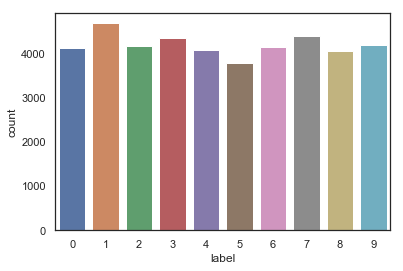

In [4]:
sns.countplot(Y_train)

g = Y_train.value_counts()
print( g )

print(Y_train.shape)

print( X_train.shape )

## Check if there are null values in the data set 


In [14]:
print(X_train.isnull().sum().sum() )

print( test.isnull().sum().sum() )

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

## the CNN converg faster on [0..1] data than on [0..255]

In [12]:
X_train = X_train/255.0

test = test/255.0

In [7]:
X_train = X_train.values.reshape( -1, 28,28,1)

test = test.values.reshape(-1,28,28,1)

print( X_train)
print(test)



[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [15]:

Y_train = to_categorical( Y_train, num_classes = 10) 
print(Y_train)  





[[[[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[1. 0. 0. ... 0. 0. 0.]
   [0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 

In [8]:
# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

(28, 28)


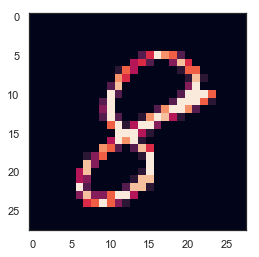

In [9]:

print( X_train[0][:,:,0].shape )


g = plt.imshow(X_train[0][:,:,0])

